Zellen in 1 mM Lactat beladen für 3/10 min  und dann abzentrifugiert, 85 µL Überstand abgenommen und im Pellet im Rest resuspendiert. 10 µL der Zellen dann zu 190 µL Hepes gegeben. Zellen also 1:20 verdünnt, Lactat auch 1:20 verdünnt. Im Vergleich zum 1. Versuch 3 min und 10 min nacheinander vermessen.

In [6]:
import sys
sys.path.insert(0, '..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1


In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
file1 = "MCT1_Efflux nach 10 min.csv"
file2 = "MCT1_Efflux(1_20)_nach3min_Inkubation (1).csv"
df1 = pd.read_csv(file1, sep=';', decimal=',', skiprows=36, encoding='latin1')
df2 = pd.read_csv(file2, sep=';', decimal=',', skiprows=36, encoding='latin1')
# Ersetze "OVER" durch NaN in der gesamten DataFrame
df1 = df1.replace('OVER', np.nan)
df2 = df2.replace('OVER', np.nan)
df1.head()


,Startzeit:,14.11.2025 15:17:20,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Zyklus Nr.,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
3,Zeit [s],0,10,20,30,40,50,60,70,80,...,390,400,410,420,430,440,450,460,470,480
4,Temp. [øC],--,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--


In [8]:
Inkubation10 = dataframe1(df1, 3, 5, 6, 7)
Inkubation3= dataframe1(df2, 3, 5, 6, 7)

print(Inkubation10.head())

   Time  1.Messung  2.Messung  3.Messung  Mittelwerte  Standardabweichung
0   0.0   0.000000   0.000000   0.000000     0.000000            0.000000
1  10.0  -0.022483  -0.015390  -0.016494    -0.018122            0.003816
2  20.0  -0.027329  -0.022474  -0.010011    -0.019938            0.008933
3  30.0  -0.040242  -0.035352  -0.003529    -0.026374            0.019935
4  40.0  -0.052725  -0.048615  -0.006455    -0.035932            0.025610


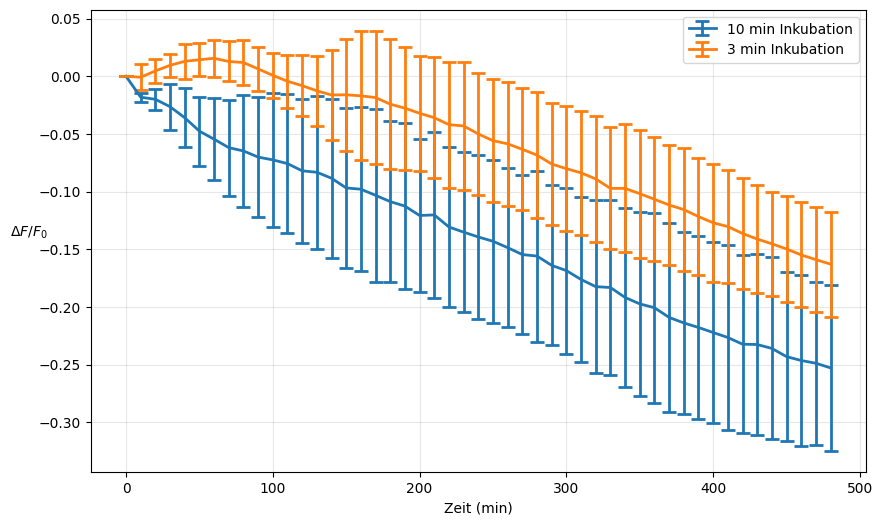

Abbildung gespeichert: ../figueres/MCT1_Efflux_3_10min_2nd_try_plot.png


In [9]:
import os
outdir = os.path.join('..', 'figueres')
os.makedirs(outdir, exist_ok=True)
filename = os.path.join(outdir, 'MCT1_Efflux_3_10min_2nd_try_plot.png')

plt.figure(figsize=(10, 6))


# Kontrolle Lactat
plt.errorbar(Inkubation10["Time"], Inkubation10["Mittelwerte"], 
             yerr=Inkubation10["Standardabweichung"],
             label="10 min Inkubation", linewidth=2, capsize=5, capthick=2)

# Kontrolle Hepes
plt.errorbar(Inkubation3["Time"], Inkubation3["Mittelwerte"],
             yerr=Inkubation3["Standardabweichung"],
             label="3 min Inkubation", linewidth=2, capsize=5, capthick=2)

# MCT1
plt.xlabel("Zeit (min)")
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=18)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.08, 0.5)
plt.legend()
plt.grid(True, alpha=0.3)

# Speichere die Abbildung als PNG
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()
print(f"Abbildung gespeichert: {filename}")


